# Global Validation of ECMWF ERA5 model runs CCI satellite SST

In [1]:
import iris
import iris.quickplot as qplt
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import iris.coord_categorisation
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition
import matplotlib

/Users/ph290/miniconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
def extract_region(cube,lon_west,lon_east,lat_south,lat_north):
    cube_region_tmp = cube.intersection(longitude=(lon_west, lon_east))
    cube_region = cube_region_tmp.intersection(latitude=(lat_south, lat_north))
    return cube_region


def area_avg(cube):
    try:
        cube.coord('latitude').guess_bounds()
    except:
        pass
    try:
        cube.coord('longitude').guess_bounds()
    except:
        pass
    grid_areas = iris.analysis.cartography.area_weights(cube)
    return cube.collapsed(['longitude', 'latitude'], iris.analysis.MEAN, weights=grid_areas)

In [58]:
file = '/Users/ph290/Downloads/global/ERA5_global_surfacetemperature.nc'
# file_bottom = '/Users/ph290/Downloads/UK/era5_uk_bottomtemperature_ym.nc'

year_for_basic_comparison = 2018
min_year_for_comparison = 2006
# NOTE was min_year_for_comparison = 2006
max_year_for_comparison = 2016

lon_west = -180.0
lon_east = 180.0
lat_south = -65.0
lat_north = 65.0

In [4]:
# obs_cube = iris.load_cube('/Users/ph290/Downloads/global_tropics/coraltemp_v1.0_19890101.nc','sea_surface_temperature')[0]
# obs_cube = iris.load_cube('/Users/ph290/Downloads/global_tropics/coraltemp_v1.0_1989.nc','sea_surface_temperature')
# obs_cube_all = iris.load_cube('/Users/ph290/Downloads/global_tropics/ESACCI-L4_GHRSST-SSTdepth-OSTIA-GLOB_CDR2.0-v02.0-fv01.0_regridded_yearmean.nc')
obs_cube_all = iris.load_cube('/Users/ph290/Downloads/global_tropics/ESACCI-L4_GHRSST-SSTdepth-OSTIA-GLOB_CDR2.0-v02.0-fv01.0_regridded_seasmean.nc')
obs_cube_all -= 273.15
# obs_cube = iris.load_cube('/Users/ph290/Downloads/global_tropics/coraltemp_v1.0_2008_all_tm.nc','sea_surface_temperature')

/Users/ph290/miniconda2/lib/python2.7/site-packages/iris/fileformats/cf.py:1143: IrisDeprecation: NetCDF default loading behaviour currently does not expose variables which define reference surfaces for dimensionless vertical coordinates as independent Cubes. This behaviour is deprecated in favour of automatic promotion to Cubes. To switch to the new behaviour, set iris.FUTURE.netcdf_promote to True.
  warn_deprecated(msg)


In [5]:
try:
    iris.coord_categorisation.add_year(obs_cube_all, 'time', name='year')
    iris.coord_categorisation.add_season_year(obs_cube_all, 'time', name='season_year')
    iris.coord_categorisation.add_season(obs_cube_all, 'time', name='season')
except:
    pass

# print obs_cube_all.coord('year').points




    
obs_cube = obs_cube_all[np.where((obs_cube_all.coord('year').points >= min_year_for_comparison) & (obs_cube_all.coord('year').points <= max_year_for_comparison))]
obs_cube_yr = obs_cube.aggregated_by('year', iris.analysis.MEAN)
obs_cube_all = obs_cube_all.aggregated_by('season', iris.analysis.MEAN)

# obs_cube = obs_cube.collapsed(['time',iris.analysis.MEAN)
# obs_cube = obs_cube_all[np.where(obs_cube_all.coord('year').points == year_for_basic_comparison)]

obs_cube_all.coord('year').points

array([ 1999.,  1999.,  1999.,  1999.])

In [59]:

cube_all = iris.load_cube(file)
try:
    iris.coord_categorisation.add_year(cube_all, 'time', name='year')
    iris.coord_categorisation.add_season(cube_all, 'time', name='season')
except:
    pass

cube_all = cube_all[np.where((cube_all.coord('year').points >= min_year_for_comparison) & (cube_all.coord('year').points <= max_year_for_comparison))]
cube_yr = cube_all.aggregated_by('year', iris.analysis.MEAN)
cube_all = cube_all.aggregated_by('season', iris.analysis.MEAN)

cube_all.data = np.ma.masked_where(cube_all.data == 9.96920997e+36, cube_all.data)





In [ ]:
# and with correct nutrients in teh winter hemisphere
file2 = '/Users/ph290/Downloads/ERA5_global_surfacetemperature_timemean_s_hem_winter.nc'
cube_all2 = iris.load_cube(file2)
# try:
#     iris.coord_categorisation.add_year(cube_all2, 'time', name='year')
#     iris.coord_categorisation.add_season(cube_all2, 'time', name='season')
# except:
#     pass

# cube_all2 = cube_all2[np.where((cube_all2.coord('year').points >= min_year_for_comparison) & (cube_all2.coord('year').points <= max_year_for_comparison))]
# cube_yr = cube_all2.aggregated_by('year', iris.analysis.MEAN)
# cube_all2 = cube_all2.aggregated_by('season', iris.analysis.MEAN)

cube_all2.data = np.ma.masked_where(cube_all2.data == 9.96920997e+36, cube_all2.data)

In [7]:
cube_all

<iris 'Cube' of unknown / (1) (-- : 4; latitude: 650; longitude: 1800)>

In [8]:
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['land'])

land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['land'])

ocean_50m = cfeature.NaturalEarthFeature('physical', 'ocean', '50m',
                                        edgecolor='red',
                                        facecolor=cfeature.COLORS['land'])

In [9]:


# cube_0 = cube.copy()
# cube_0_data = cube_0.data
# lat = cube_0.coord('latitude').points
# lon = cube_0.coord('longitude').points

# fig = plt.figure(figsize=(20, 20))
# ax1 = fig.add_subplot(1, 3, 1, projection=ccrs.PlateCarree())
# p1 = ax1.pcolormesh(lon, lat,cube_0_data,
#                 transform=ccrs.PlateCarree(),vmin=0,vmax=35,
#                 cmap='plasma')
# # plt.pcolormesh(lon,lat,np.roll(cube_0_data,90,axis=0),vmin=20,vmax=35)
# ax1.add_feature(land_50m, edgecolor='gray')
# cbar1 = plt.colorbar(p1,ax=ax1,orientation='horizontal')
# cbar1.set_label('$^{\circ}$C')


# #########

# obs_cube_region = extract_region(obs_cube,lon_west,lon_east,lat_south,lat_north)

# obs_cube_data = obs_cube_region.data
# lat2 = obs_cube_region.coord('latitude').points
# lon2 = obs_cube_region.coord('longitude').points

# ax2 = fig.add_subplot(1, 3, 2, projection=ccrs.PlateCarree())
# p2 = ax2.pcolormesh(lon2, lat2,obs_cube_data,
#                 transform=ccrs.PlateCarree(),vmin=0,vmax=35,
#                 cmap='plasma')
# # plt.pcolormesh(lon,lat,np.roll(cube_0_data,90,axis=0),vmin=20,vmax=35)
# ax2.add_feature(land_50m, edgecolor='gray')
# cbar2 = plt.colorbar(p2,ax=ax2,orientation='horizontal')
# cbar2.set_label('$^{\circ}$C')
# ####

# ax3 = fig.add_subplot(1, 3, 3, projection=ccrs.PlateCarree())

# p3 = ax3.pcolormesh(lon2, lat2,obs_cube_data,
#                 transform=ccrs.PlateCarree(),vmin=0,vmax=35,
#                 cmap='plasma')
# p3b = ax3.pcolormesh(lon, lat,cube_0_data,
#                 transform=ccrs.PlateCarree(),vmin=0,vmax=35,
#                 cmap='plasma')
# # plt.pcolormesh(lon,lat,np.roll(cube_0_data,90,axis=0),vmin=20,vmax=35)
# ax3.add_feature(land_50m, edgecolor='gray')
# cbar3 = plt.colorbar(p3,ax=ax3,orientation='horizontal')
# cbar3.set_label('$^{\circ}$C')

# # plt.gca().coastlines('10m')

# plt.savefig('/Users/ph290/Documents/HalloranSync/documents/figures/global_s2p3.png',dpi=600)
# plt.show()

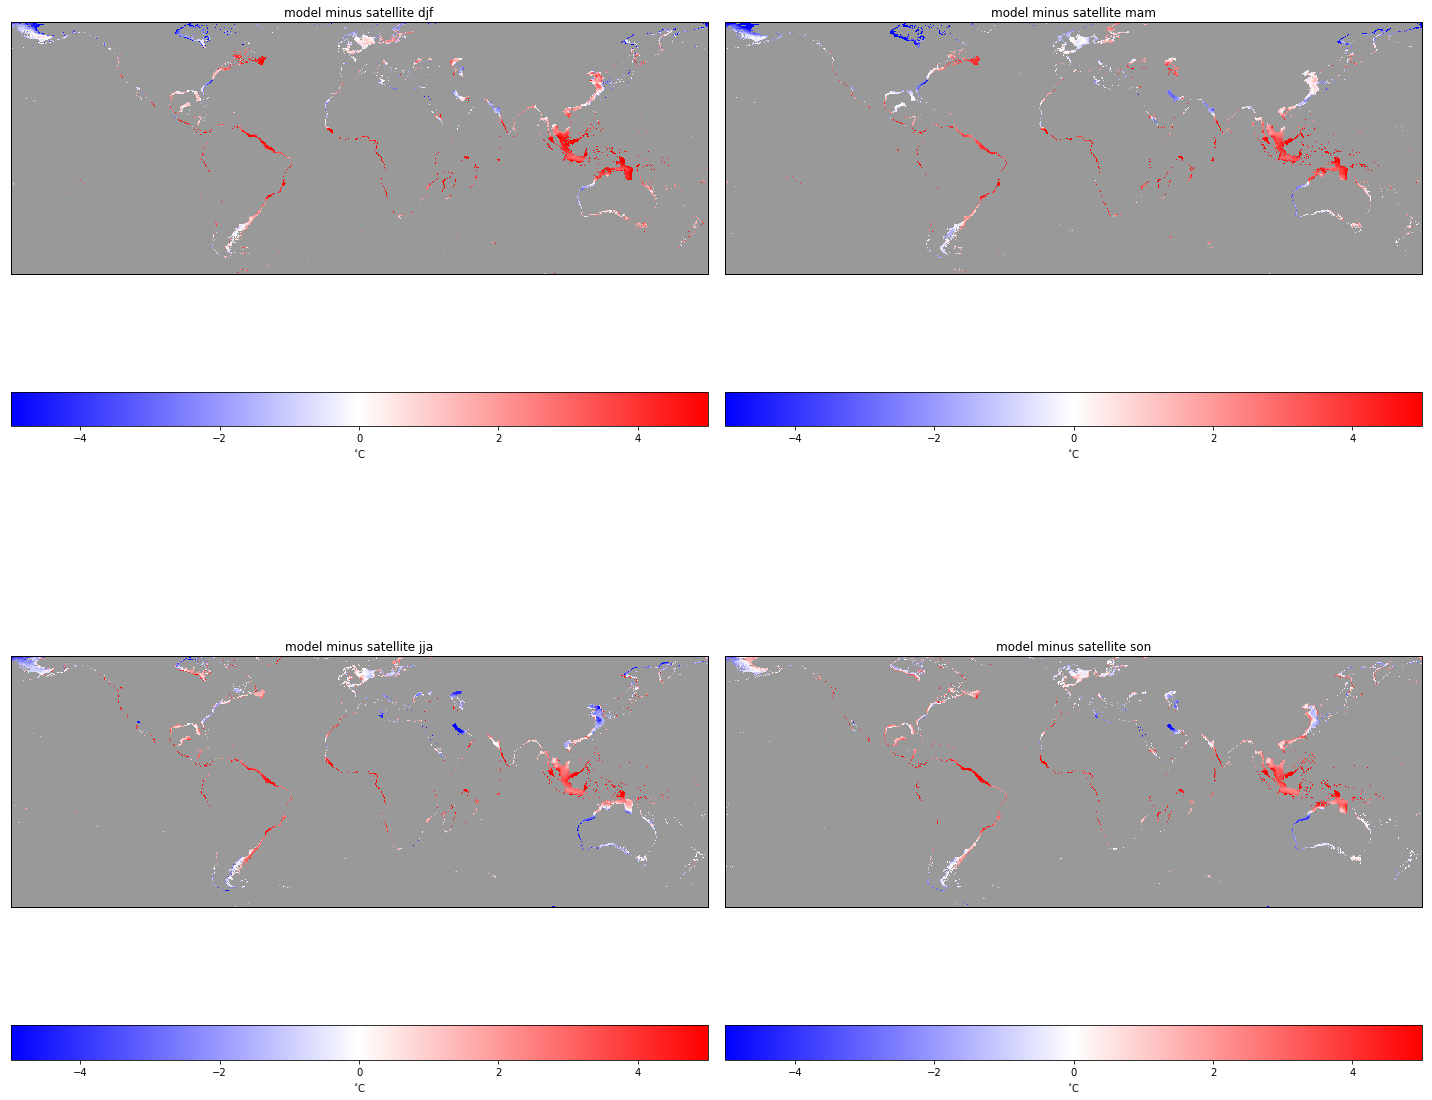

In [10]:
plt.close('all')

fig = plt.figure(figsize=(20, 20))

seasons = cube_all.coord('season').points

for i,season in enumerate(seasons):

# i=0
# season = seasons[0]

    ax3 = plt.subplot(2, 2, i+1, projection=ccrs.PlateCarree())
    # ax3 = plt.axes(projection=ccrs.PlateCarree())
    ax3.set_extent((lon_west, lon_east, lat_south, lat_north), crs=ccrs.PlateCarree())

    c_model = extract_region(cube_all[np.where(cube_all.coord('season').points == season)],lon_west,lon_east,lat_south,lat_north)
    # c_model.coord('longitude').points = c_model.coord('longitude').points + 180

    c_obs_region = extract_region(obs_cube_all[np.where(cube_all.coord('season').points == season)],lon_west,lon_east,lat_south,lat_north)

    c_model.coord('latitude').coord_system = c_obs_region.coord('latitude').coord_system
    c_model.coord('longitude').coord_system = c_obs_region.coord('longitude').coord_system

    c_obs_region_regridded = c_obs_region.regrid(c_model, iris.analysis.Linear())
    # obs_cube_all_region.data.mask = obs_cube_all_region_regridded.data.mask

    model_data = c_model.data
    lat_model = c_model.coord('latitude').points
    lon_model = c_model.coord('longitude').points


    obs_data = c_obs_region_regridded.data
    lat_obs = c_obs_region_regridded.coord('latitude').points
    lon_obs = c_obs_region_regridded.coord('longitude').points



    # ax3 = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

    # ax3.contour(lon_bathy, lat_bathy,bathy_data,5,colors = 'k')
    # fig.patch.set_facecolor('grey')

    cmap = matplotlib.cm.bwr
    cmap.set_bad((0.6, 0.6, 0.6, 0.6),1.)

#     ax3.add_feature(land_10m, edgecolor='k')

    p3 = ax3.pcolormesh(lon_obs, lat_model,model_data[0,:,:] - obs_data[0,:,:],
                    transform=ccrs.PlateCarree(),vmin=-5,vmax=5,
                    cmap=cmap)
    cbar = plt.colorbar(p3,orientation='horizontal')
    cbar.set_label('$^{\circ}$C')


    ax3.title.set_text('model minus satellite '+season)
#     im = plt.imread('/Users/ph290/ocean_currents2.png')
#     #     newax = fig.add_axes([0.0, 0.0, 1.0, 1.0], anchor='NE', zorder=1)
#     #     newax = fig.add_axes([0.0, 0.0, 1.0, 1.0], zorder=1)
#     newax = fig.add_subplot(2, 2, i+1, zorder=1)
# #     plt.subplots_adjust(bottom = 0.0,top=0.1)
# #     plt.subplots_adjust(bottom=0.0, left=0.1,right=0.9, top=0.8)
#     newax.imshow(im)
#     newax.axis('off')

plt.tight_layout()

plt.savefig('/Users/ph290/Documents/HalloranSync/documents/papers_in_prep/s2p3v2/figures/global_sst_validation_cci_seasonal.png')

plt.show()

/Users/ph290/miniconda2/lib/python2.7/site-packages/iris/coords.py:1017: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for u'time'.
  warnings.warn(msg.format(self.name()))
/Users/ph290/miniconda2/lib/python2.7/site-packages/iris/coords.py:1017: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for u'year'.
  warnings.warn(msg.format(self.name()))
/Users/ph290/miniconda2/lib/python2.7/site-packages/iris/coords.py:1017: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for u'season_year'.
  warnings.warn(msg.format(self.name()))
/Users/ph290/miniconda2/lib/python2.7/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
/Users/ph290/miniconda2/lib/python2.7/site-packages/matplotlib/font_manager.py

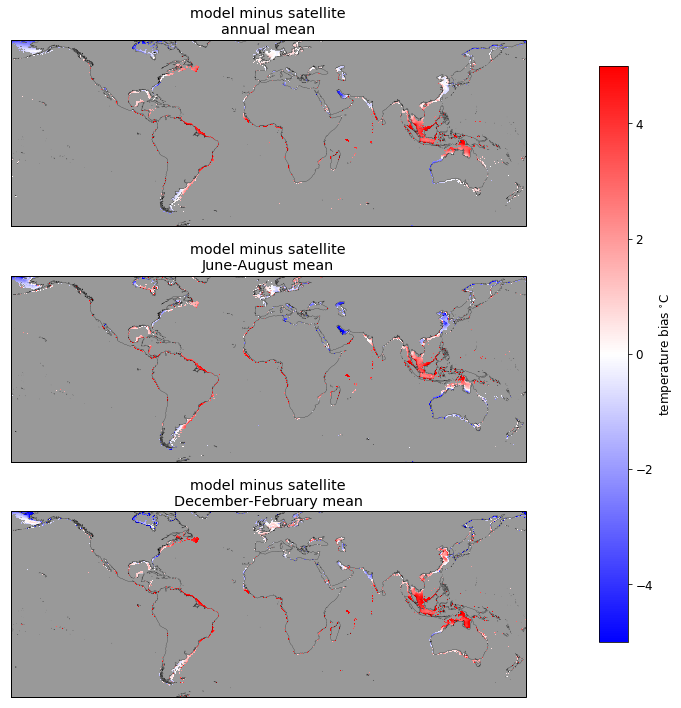

In [11]:
import matplotlib

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)


plt.close('all')

fig = plt.figure(figsize=(20, 10))

seasons = cube_all.coord('season').points

ax3 = plt.subplot(3, 1, 1, projection=ccrs.PlateCarree())
# ax3 = plt.axes(projection=ccrs.PlateCarree())
ax3.set_extent((lon_west, lon_east, lat_south, lat_north), crs=ccrs.PlateCarree())

cube_all2 = cube_all.collapsed('time',iris.analysis.MEAN)

c_model = extract_region(cube_all2,lon_west,lon_east,lat_south,lat_north)
# c_model.coord('longitude').points = c_model.coord('longitude').points + 180


obs_cube_all2 = obs_cube_all.collapsed('time',iris.analysis.MEAN)
c_obs_region = extract_region(obs_cube_all2,lon_west,lon_east,lat_south,lat_north)

c_model.coord('latitude').coord_system = c_obs_region.coord('latitude').coord_system
c_model.coord('longitude').coord_system = c_obs_region.coord('longitude').coord_system

c_obs_region_regridded = c_obs_region.regrid(c_model, iris.analysis.Linear())
# obs_cube_all_region.data.mask = obs_cube_all_region_regridded.data.mask

model_data = c_model.data
lat_model = c_model.coord('latitude').points
lon_model = c_model.coord('longitude').points


obs_data = c_obs_region_regridded.data
lat_obs = c_obs_region_regridded.coord('latitude').points
lon_obs = c_obs_region_regridded.coord('longitude').points

cmap = matplotlib.cm.bwr
cmap.set_bad((0.6, 0.6, 0.6, 0.6),1.)


p3 = ax3.pcolormesh(lon_obs, lat_model,model_data - obs_data,
                transform=ccrs.PlateCarree(),vmin=-5,vmax=5,
                cmap=cmap)

plt.gca().coastlines('50m', linewidth=0.2)

# cbar = plt.colorbar(p3,orientation='horizontal')
# cbar.set_label('$^{\circ}$C')

ax3.title.set_text('model minus satellite\nannual mean')

#########

season = 'jja'

ax3 = plt.subplot(3, 1, 2, projection=ccrs.PlateCarree())
# ax3 = plt.axes(projection=ccrs.PlateCarree())
ax3.set_extent((lon_west, lon_east, lat_south, lat_north), crs=ccrs.PlateCarree())

c_model = extract_region(cube_all[np.where(cube_all.coord('season').points == season)],lon_west,lon_east,lat_south,lat_north)
# c_model.coord('longitude').points = c_model.coord('longitude').points + 180

c_obs_region = extract_region(obs_cube_all[np.where(cube_all.coord('season').points == season)],lon_west,lon_east,lat_south,lat_north)

c_model.coord('latitude').coord_system = c_obs_region.coord('latitude').coord_system
c_model.coord('longitude').coord_system = c_obs_region.coord('longitude').coord_system

c_obs_region_regridded = c_obs_region.regrid(c_model, iris.analysis.Linear())
# obs_cube_all_region.data.mask = obs_cube_all_region_regridded.data.mask

model_data = c_model.data
lat_model = c_model.coord('latitude').points
lon_model = c_model.coord('longitude').points


obs_data = c_obs_region_regridded.data
lat_obs = c_obs_region_regridded.coord('latitude').points
lon_obs = c_obs_region_regridded.coord('longitude').points

cmap = matplotlib.cm.bwr
cmap.set_bad((0.6, 0.6, 0.6, 0.6),1.)


p3 = ax3.pcolormesh(lon_obs, lat_model,model_data[0,:,:] - obs_data[0,:,:],
                transform=ccrs.PlateCarree(),vmin=-5,vmax=5,
                cmap=cmap)

plt.gca().coastlines('50m', linewidth=0.2)

# cbar = plt.colorbar(p3,orientation='horizontal')
# cbar.set_label('$^{\circ}$C')

ax3.title.set_text('model minus satellite\nJune-August mean')

# ##########

season = 'djf'

ax3 = plt.subplot(3, 1, 3, projection=ccrs.PlateCarree())
# ax3 = plt.axes(projection=ccrs.PlateCarree())
ax3.set_extent((lon_west, lon_east, lat_south, lat_north), crs=ccrs.PlateCarree())

c_model = extract_region(cube_all[np.where(cube_all.coord('season').points == season)],lon_west,lon_east,lat_south,lat_north)
# c_model.coord('longitude').points = c_model.coord('longitude').points + 180

c_obs_region = extract_region(obs_cube_all[np.where(cube_all.coord('season').points == season)],lon_west,lon_east,lat_south,lat_north)

c_model.coord('latitude').coord_system = c_obs_region.coord('latitude').coord_system
c_model.coord('longitude').coord_system = c_obs_region.coord('longitude').coord_system

c_obs_region_regridded = c_obs_region.regrid(c_model, iris.analysis.Linear())
# obs_cube_all_region.data.mask = obs_cube_all_region_regridded.data.mask

model_data = c_model.data
lat_model = c_model.coord('latitude').points
lon_model = c_model.coord('longitude').points


obs_data = c_obs_region_regridded.data
lat_obs = c_obs_region_regridded.coord('latitude').points
lon_obs = c_obs_region_regridded.coord('longitude').points


cmap = matplotlib.cm.bwr
cmap.set_bad((0.6, 0.6, 0.6, 0.6),1.)


p3 = ax3.pcolormesh(lon_obs, lat_model,model_data[0,:,:] - obs_data[0,:,:],
                transform=ccrs.PlateCarree(),vmin=-5,vmax=5,
                cmap=cmap)
plt.gca().coastlines('50m', linewidth=0.2)

cb_ax = fig.add_axes([0.73, 0.1, 0.02, 0.8])
cbar = fig.colorbar(p3, cax=cb_ax)
cbar.set_label('temperature bias $^{\circ}$C')

# cbar = plt.colorbar(p3,orientation='horizontal')
# cbar.set_label('$^{\circ}$C')

ax3.title.set_text('model minus satellite\nDecember-February mean')


# #############





plt.tight_layout()

plt.savefig('/Users/ph290/Documents/HalloranSync/documents/papers_in_prep/s2p3v2/figures/global_sst_validation_cci_seasonal3.png')

# plt.show()

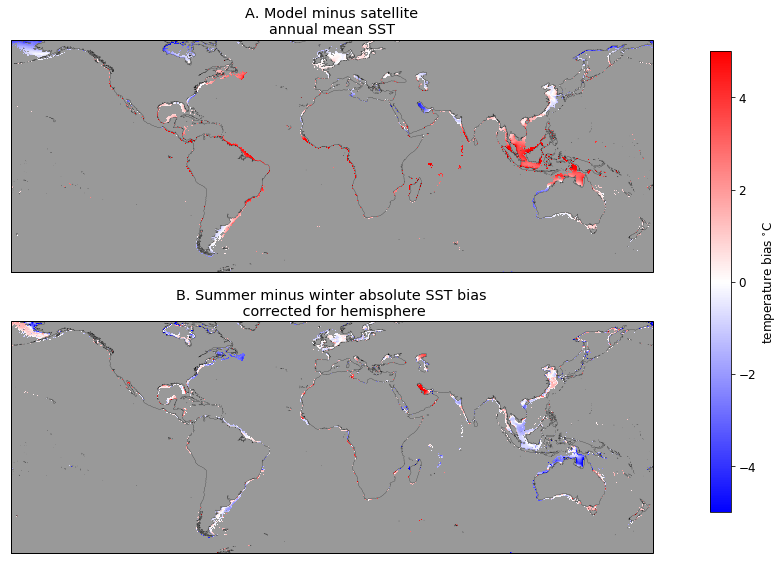

In [12]:
import matplotlib

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)


plt.close('all')

fig = plt.figure(figsize=(15, 8))

seasons = cube_all.coord('season').points

ax3 = plt.subplot(2, 1, 1, projection=ccrs.PlateCarree())
# ax3 = plt.axes(projection=ccrs.PlateCarree())
ax3.set_extent((lon_west, lon_east, lat_south, lat_north), crs=ccrs.PlateCarree())

cube_all2 = cube_all.collapsed('time',iris.analysis.MEAN)

c_model = extract_region(cube_all2,lon_west,lon_east,lat_south,lat_north)
# c_model.coord('longitude').points = c_model.coord('longitude').points + 180


obs_cube_all2 = obs_cube_all.collapsed('time',iris.analysis.MEAN)
c_obs_region = extract_region(obs_cube_all2,lon_west,lon_east,lat_south,lat_north)

c_model.coord('latitude').coord_system = c_obs_region.coord('latitude').coord_system
c_model.coord('longitude').coord_system = c_obs_region.coord('longitude').coord_system

c_obs_region_regridded = c_obs_region.regrid(c_model, iris.analysis.Linear())
# obs_cube_all_region.data.mask = obs_cube_all_region_regridded.data.mask

model_data = c_model.data
lat_model = c_model.coord('latitude').points
lon_model = c_model.coord('longitude').points


obs_data = c_obs_region_regridded.data
lat_obs = c_obs_region_regridded.coord('latitude').points
lon_obs = c_obs_region_regridded.coord('longitude').points

cmap = matplotlib.cm.bwr
cmap.set_bad((0.6, 0.6, 0.6, 0.6),1.)


p3 = ax3.pcolormesh(lon_obs, lat_model,model_data - obs_data,
                transform=ccrs.PlateCarree(),vmin=-5,vmax=5,
                cmap=cmap)

plt.gca().coastlines('50m', linewidth=0.2)

# cbar = plt.colorbar(p3,orientation='horizontal')
# cbar.set_label('$^{\circ}$C')

ax3.title.set_text('A. Model minus satellite\nannual mean SST')

#########


ax3 = plt.subplot(2, 1, 2, projection=ccrs.PlateCarree())
# ax3 = plt.axes(projection=ccrs.PlateCarree())
ax3.set_extent((lon_west, lon_east, lat_south, lat_north), crs=ccrs.PlateCarree())

season = 'jja'
c_model1 = extract_region(cube_all[np.where(cube_all.coord('season').points == season)],lon_west,lon_east,lat_south,lat_north)
c_obs_region1 = extract_region(obs_cube_all[np.where(cube_all.coord('season').points == season)],lon_west,lon_east,lat_south,lat_north)
c_model1.coord('latitude').coord_system = c_obs_region1.coord('latitude').coord_system
c_model1.coord('longitude').coord_system = c_obs_region1.coord('longitude').coord_system
c_obs_region_regridded1 = c_obs_region1.regrid(c_model1, iris.analysis.Linear())

season = 'djf'
c_model2 = extract_region(cube_all[np.where(cube_all.coord('season').points == season)],lon_west,lon_east,lat_south,lat_north)
c_obs_region2 = extract_region(obs_cube_all[np.where(cube_all.coord('season').points == season)],lon_west,lon_east,lat_south,lat_north)
c_model2.coord('latitude').coord_system = c_obs_region2.coord('latitude').coord_system
c_model2.coord('longitude').coord_system = c_obs_region2.coord('longitude').coord_system
c_obs_region_regridded2 = c_obs_region2.regrid(c_model2, iris.analysis.Linear())

model_data = c_model1.data
obs_data = c_obs_region_regridded1.data
model_minus_obs1 = model_data[0,:,:] - obs_data[0,:,:]

model_data = c_model2.data
obs_data = c_obs_region_regridded2.data
model_minus_obs2 = model_data[0,:,:] - obs_data[0,:,:]

model_minus_obs1_abs = np.absolute(model_minus_obs1)
model_minus_obs2_abs = np.absolute(model_minus_obs2)


lat_model = c_model.coord('latitude').points
lon_model = c_model.coord('longitude').points
obs_data = c_obs_region_regridded.data
lat_obs = c_obs_region_regridded.coord('latitude').points
lon_obs = c_obs_region_regridded.coord('longitude').points

cmap = matplotlib.cm.bwr
cmap.set_bad((0.6, 0.6, 0.6, 0.6),1.)
# plt.pcolormesh(model_minus_obs1_abs - model_minus_obs2_abs,vmin=-10.0,vmax=10.0,cmap='bwr')

data_to_plot = model_minus_obs1_abs - model_minus_obs2_abs

data_to_plot2 = data_to_plot.copy()
data_to_plot2[0:235,:] = data_to_plot[0:235,:] * -1.0

p3 = ax3.pcolormesh(lon_obs, lat_model,data_to_plot2,
                transform=ccrs.PlateCarree(),vmin=-5,vmax=5,
                cmap=cmap)

plt.gca().coastlines('50m', linewidth=0.2)

# cbar = plt.colorbar(p3,orientation='horizontal')
# cbar.set_label('$^{\circ}$C')

ax3.title.set_text('B. Summer minus winter absolute SST bias\n corrected for hemisphere')


cb_ax = fig.add_axes([0.85, 0.1, 0.02, 0.8])
cbar = fig.colorbar(p3, cax=cb_ax)
cbar.set_label('temperature bias $^{\circ}$C')



plt.tight_layout()

plt.savefig('/Users/ph290/Documents/HalloranSync/documents/papers_in_prep/s2p3v2/figures/global_sst_validation_cci_seasonal4.png')

# plt.show()

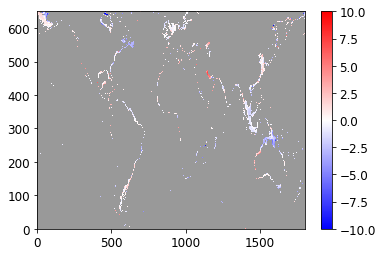

In [13]:
model_minus_obs1_abs = np.absolute(model_minus_obs1)
model_minus_obs2_abs = np.absolute(model_minus_obs2)

plt.pcolormesh(model_minus_obs1_abs - model_minus_obs2_abs,vmin=-10.0,vmax=10.0,cmap='bwr')
plt.colorbar()

# Do the same thing but single season

In [14]:
print(seasons)

['djf' 'mam' 'jja' 'son']


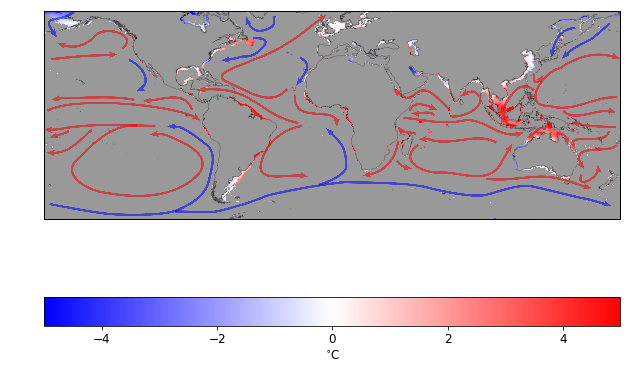

In [15]:
## plt.close('all')

fig = plt.figure(figsize=(10, 10))


ax3 = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
# ax3 = plt.axes(projection=ccrs.PlateCarree())
ax3.set_extent((lon_west, lon_east, lat_south, lat_north), crs=ccrs.PlateCarree())

cube_all_tmp = cube_all.collapsed('time',iris.analysis.MEAN)
c_model = extract_region(cube_all_tmp,lon_west,lon_east,lat_south,lat_north)
# c_model.coord('longitude').points = c_model.coord('longitude').points + 180

obs_cube_all_tmp = obs_cube_all.collapsed('time',iris.analysis.MEAN)
c_obs_region = extract_region(obs_cube_all_tmp,lon_west,lon_east,lat_south,lat_north)

c_model.coord('latitude').coord_system = c_obs_region.coord('latitude').coord_system
c_model.coord('longitude').coord_system = c_obs_region.coord('longitude').coord_system

c_obs_region_regridded = c_obs_region.regrid(c_model, iris.analysis.Linear())
# obs_cube_all_region.data.mask = obs_cube_all_region_regridded.data.mask

model_data = c_model.data
lat_model = c_model.coord('latitude').points
lon_model = c_model.coord('longitude').points


obs_data = c_obs_region_regridded.data
lat_obs = c_obs_region_regridded.coord('latitude').points
lon_obs = c_obs_region_regridded.coord('longitude').points



# ax3 = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# ax3.contour(lon_bathy, lat_bathy,bathy_data,5,colors = 'k')
# fig.patch.set_facecolor('grey')

cmap = matplotlib.cm.bwr
# cmap.set_bad((1.0, 1.0, 1.0, 1.0),1.)
# cmap.set_bad((0.2, 0.2, 0.2, 0.2),1.)
cmap.set_bad((0.6, 0.6, 0.6, 0.6),1.)

# cmap = matplotlib.cm.coolwarm

# ax3.add_feature(land_10m,edgecolor='none',facecolor=np.array([ 0.3 , 0.3 , 0.3]),)

plt.gca().coastlines('50m', linewidth=0.2)


p3 = ax3.pcolormesh(lon_obs, lat_model,model_data[:,:] - obs_data[:,:],transform=ccrs.PlateCarree(),vmin=-5,vmax=5,
cmap=cmap)
cbar = plt.colorbar(p3,orientation='horizontal')
cbar.set_label('$^{\circ}$C')


# ax3.title.set_text('model minus satellite')
im = plt.imread('/Users/ph290/ocean_currents3.png')
#     newax = fig.add_axes([0.0, 0.0, 1.0, 1.0], anchor='NE', zorder=1)
#     newax = fig.add_axes([0.0, 0.0, 1.0, 1.0], zorder=1)
newax = fig.add_subplot(1, 1, 1, zorder=1)
# plt.subplots_adjust(bottom = 0.0,top=0.1)
plt.subplots_adjust(bottom=0.075, left=0.1,right=0.9, top=0.8)
newax.imshow(im)
newax.axis('off')

# plt.tight_layout()

plt.savefig('/Users/ph290/Documents/HalloranSync/documents/papers_in_prep/s2p3v2/figures/global_sst_validation_cci_2.png',dpi=600)
# plt.savefig('/Users/ph290/Documents/HalloranSync/documents/papers_in_prep/s2p3v2/figures/global_sst_validation_cci_2.pdf')

plt.show()

In [35]:
file = '/Users/ph290/Downloads/download_timmean.nc'

cs= iris.load(file)
data = cs[2][0].data
data += cs[3][0].data
data += cs[4][0].data
data += cs[5][0].data

era5_heat_flux = cs[0][0]
era5_heat_flux.data = data

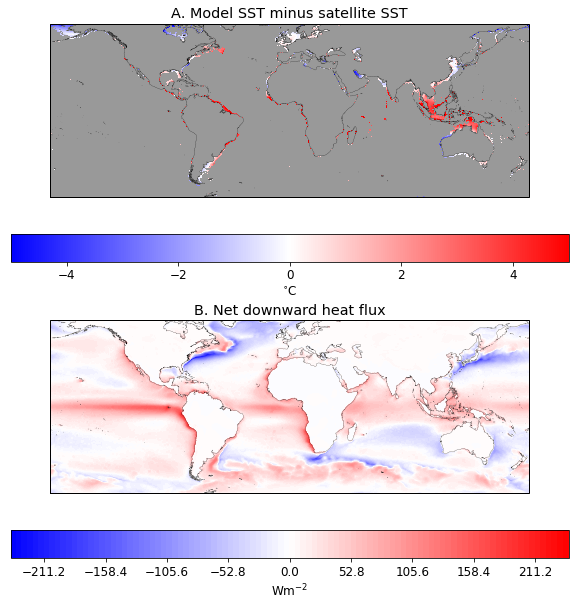

In [54]:
## plt.close('all')

fig = plt.figure(figsize=(10, 10))


ax3 = plt.subplot(2, 1, 1, projection=ccrs.PlateCarree())
# ax3 = plt.axes(projection=ccrs.PlateCarree())
ax3.set_extent((lon_west, lon_east, lat_south, lat_north), crs=ccrs.PlateCarree())

cube_all_tmp = cube_all.collapsed('time',iris.analysis.MEAN)
c_model = extract_region(cube_all_tmp,lon_west,lon_east,lat_south,lat_north)
# c_model.coord('longitude').points = c_model.coord('longitude').points + 180

obs_cube_all_tmp = obs_cube_all.collapsed('time',iris.analysis.MEAN)
c_obs_region = extract_region(obs_cube_all_tmp,lon_west,lon_east,lat_south,lat_north)

c_model.coord('latitude').coord_system = c_obs_region.coord('latitude').coord_system
c_model.coord('longitude').coord_system = c_obs_region.coord('longitude').coord_system

c_obs_region_regridded = c_obs_region.regrid(c_model, iris.analysis.Linear())
# obs_cube_all_region.data.mask = obs_cube_all_region_regridded.data.mask

model_data = c_model.data
lat_model = c_model.coord('latitude').points
lon_model = c_model.coord('longitude').points


obs_data = c_obs_region_regridded.data
lat_obs = c_obs_region_regridded.coord('latitude').points
lon_obs = c_obs_region_regridded.coord('longitude').points

era5_heat_flux_regridded = era5_heat_flux.regrid(c_model, iris.analysis.Linear())/86400.0


# ax3 = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# ax3.contour(lon_bathy, lat_bathy,bathy_data,5,colors = 'k')
# fig.patch.set_facecolor('grey')

cmap = matplotlib.cm.bwr
# cmap.set_bad((1.0, 1.0, 1.0, 1.0),1.)
# cmap.set_bad((0.2, 0.2, 0.2, 0.2),1.)
cmap.set_bad((0.6, 0.6, 0.6, 0.6),1.)

# cmap = matplotlib.cm.coolwarm

# ax3.add_feature(land_10m,edgecolor='none',facecolor=np.array([ 0.3 , 0.3 , 0.3]),)

# plt.gca().coastlines('50m', linewidth=0.2)


p3 = ax3.pcolormesh(lon_obs, lat_model,model_data[:,:] - obs_data[:,:],transform=ccrs.PlateCarree(),vmin=-5,vmax=5,
cmap=cmap)
ax3.set_title('A. Model SST minus satellite SST')


cbar = plt.colorbar(p3,orientation='horizontal')
cbar.set_label('$^{\circ}$C')
plt.gca().coastlines('50m', linewidth=0.2)



ax4 = plt.subplot(2, 1, 2, projection=ccrs.PlateCarree())
# ax3 = plt.axes(projection=ccrs.PlateCarree())
ax4.set_extent((lon_west, lon_east, lat_south, lat_north), crs=ccrs.PlateCarree())

p4 = ax4.contourf(lon_obs, lat_model,era5_heat_flux_regridded.data,transform=ccrs.PlateCarree(),levels = np.linspace(-240,240,101),
cmap=cmap)
ax4.set_title('B. Net downward heat flux')
cbar4 = plt.colorbar(p4,orientation='horizontal')
cbar4.set_label('Wm$^{-2}$')

plt.gca().coastlines('50m', linewidth=0.2)


# # ax3.title.set_text('model minus satellite')
# im = plt.imread('/Users/ph290/ocean_currents3.png')
# #     newax = fig.add_axes([0.0, 0.0, 1.0, 1.0], anchor='NE', zorder=1)
# #     newax = fig.add_axes([0.0, 0.0, 1.0, 1.0], zorder=1)
# newax = fig.add_subplot(1, 1, 1, zorder=1)
# # plt.subplots_adjust(bottom = 0.0,top=0.1)
# plt.subplots_adjust(bottom=0.075, left=0.1,right=0.9, top=0.8)
# newax.imshow(im)
# newax.axis('off')

# plt.tight_layout()

plt.savefig('/Users/ph290/Documents/HalloranSync/documents/papers_in_prep/s2p3v2/figures/global_sst_validation_cci_5.png',dpi=600)
# plt.savefig('/Users/ph290/Documents/HalloranSync/documents/papers_in_prep/s2p3v2/figures/global_sst_validation_cci_2.pdf')

plt.show()

## s. hem winter nutrients

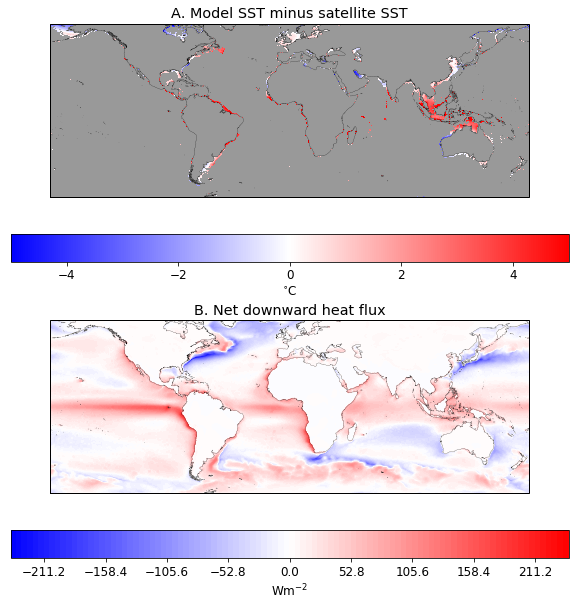

In [61]:
## plt.close('all')

fig = plt.figure(figsize=(10, 10))


ax3 = plt.subplot(2, 1, 1, projection=ccrs.PlateCarree())
# ax3 = plt.axes(projection=ccrs.PlateCarree())
ax3.set_extent((lon_west, lon_east, lat_south, lat_north), crs=ccrs.PlateCarree())

cube_all_tmp = cube_all2.collapsed('time',iris.analysis.MEAN)
c_model = extract_region(cube_all_tmp,lon_west,lon_east,lat_south,lat_north)
# c_model.coord('longitude').points = c_model.coord('longitude').points + 180

obs_cube_all_tmp = obs_cube_all.collapsed('time',iris.analysis.MEAN)
c_obs_region = extract_region(obs_cube_all_tmp,lon_west,lon_east,lat_south,lat_north)

c_model.coord('latitude').coord_system = c_obs_region.coord('latitude').coord_system
c_model.coord('longitude').coord_system = c_obs_region.coord('longitude').coord_system

c_obs_region_regridded = c_obs_region.regrid(c_model, iris.analysis.Linear())
# obs_cube_all_region.data.mask = obs_cube_all_region_regridded.data.mask

model_data = c_model.data
lat_model = c_model.coord('latitude').points
lon_model = c_model.coord('longitude').points


obs_data = c_obs_region_regridded.data
lat_obs = c_obs_region_regridded.coord('latitude').points
lon_obs = c_obs_region_regridded.coord('longitude').points

era5_heat_flux_regridded = era5_heat_flux.regrid(c_model, iris.analysis.Linear())/86400.0


# ax3 = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# ax3.contour(lon_bathy, lat_bathy,bathy_data,5,colors = 'k')
# fig.patch.set_facecolor('grey')

cmap = matplotlib.cm.bwr
# cmap.set_bad((1.0, 1.0, 1.0, 1.0),1.)
# cmap.set_bad((0.2, 0.2, 0.2, 0.2),1.)
cmap.set_bad((0.6, 0.6, 0.6, 0.6),1.)

# cmap = matplotlib.cm.coolwarm

# ax3.add_feature(land_10m,edgecolor='none',facecolor=np.array([ 0.3 , 0.3 , 0.3]),)

# plt.gca().coastlines('50m', linewidth=0.2)


p3 = ax3.pcolormesh(lon_obs, lat_model,model_data[:,:] - obs_data[:,:],transform=ccrs.PlateCarree(),vmin=-5,vmax=5,
cmap=cmap)
ax3.set_title('A. Model SST minus satellite SST')


cbar = plt.colorbar(p3,orientation='horizontal')
cbar.set_label('$^{\circ}$C')
plt.gca().coastlines('50m', linewidth=0.2)



ax4 = plt.subplot(2, 1, 2, projection=ccrs.PlateCarree())
# ax3 = plt.axes(projection=ccrs.PlateCarree())
ax4.set_extent((lon_west, lon_east, lat_south, lat_north), crs=ccrs.PlateCarree())

p4 = ax4.contourf(lon_obs, lat_model,era5_heat_flux_regridded.data,transform=ccrs.PlateCarree(),levels = np.linspace(-240,240,101),
cmap=cmap)
ax4.set_title('B. Net downward heat flux')
cbar4 = plt.colorbar(p4,orientation='horizontal')
cbar4.set_label('Wm$^{-2}$')

plt.gca().coastlines('50m', linewidth=0.2)


# # ax3.title.set_text('model minus satellite')
# im = plt.imread('/Users/ph290/ocean_currents3.png')
# #     newax = fig.add_axes([0.0, 0.0, 1.0, 1.0], anchor='NE', zorder=1)
# #     newax = fig.add_axes([0.0, 0.0, 1.0, 1.0], zorder=1)
# newax = fig.add_subplot(1, 1, 1, zorder=1)
# # plt.subplots_adjust(bottom = 0.0,top=0.1)
# plt.subplots_adjust(bottom=0.075, left=0.1,right=0.9, top=0.8)
# newax.imshow(im)
# newax.axis('off')

# plt.tight_layout()

plt.savefig('/Users/ph290/Documents/HalloranSync/documents/papers_in_prep/s2p3v2/figures/global_sst_validation_cci_5_shem_winter_nut.png',dpi=600)
# plt.savefig('/Users/ph290/Documents/HalloranSync/documents/papers_in_prep/s2p3v2/figures/global_sst_validation_cci_2.pdf')

plt.show()

In [16]:
lon_obs, lat_model,model_data[0] - obs_data

(array([-180. , -179.8, -179.6, ...,  179.4,  179.6,  179.8]),
 array([-65. , -64.8, -64.6, -64.4, -64.2, -64. , -63.8, -63.6, -63.4,
        -63.2, -63. , -62.8, -62.6, -62.4, -62.2, -62. , -61.8, -61.6,
        -61.4, -61.2, -61. , -60.8, -60.6, -60.4, -60.2, -60. , -59.8,
        -59.6, -59.4, -59.2, -59. , -58.8, -58.6, -58.4, -58.2, -58. ,
        -57.8, -57.6, -57.4, -57.2, -57. , -56.8, -56.6, -56.4, -56.2,
        -56. , -55.8, -55.6, -55.4, -55.2, -55. , -54.8, -54.6, -54.4,
        -54.2, -54. , -53.8, -53.6, -53.4, -53.2, -53. , -52.8, -52.6,
        -52.4, -52.2, -52. , -51.8, -51.6, -51.4, -51.2, -51. , -50.8,
        -50.6, -50.4, -50.2, -50. , -49.8, -49.6, -49.4, -49.2, -49. ,
        -48.8, -48.6, -48.4, -48.2, -48. , -47.8, -47.6, -47.4, -47.2,
        -47. , -46.8, -46.6, -46.4, -46.2, -46. , -45.8, -45.6, -45.4,
        -45.2, -45. , -44.8, -44.6, -44.4, -44.2, -44. , -43.8, -43.6,
        -43.4, -43.2, -43. , -42.8, -42.6, -42.4, -42.2, -42. , -41.8,
        -41.6,

In [17]:
latitude = iris.coords.DimCoord(np.arange(-65, 65, 0.2),standard_name='latitude', units='degrees')
longitude = iris.coords.DimCoord(np.arange(-180, 180, 0.2),standard_name='longitude', units='degrees')
cube = iris.cube.Cube(np.zeros((650, 1800),np.float32),standard_name='sea_surface_temperature',long_name='Sea Surface Temperature', var_name='tos',units='K',dim_coords_and_dims=[(latitude, 0), (longitude, 1)])

cube.data = model_data[0] - obs_data
iris.fileformats.netcdf.save(cube, '/Users/ph290/Downloads/model_minus_satellite_ann_avg_sst.nc', netcdf_format='NETCDF4')


/Users/ph290/miniconda2/lib/python2.7/site-packages/iris/fileformats/netcdf.py:2281: IrisDeprecation: NetCDF default saving behaviour currently assigns the outermost dimensions to unlimited. This behaviour is to be deprecated, in favour of no automatic assignment. To switch to the new behaviour, set iris.FUTURE.netcdf_no_unlimited to True.
  warn_deprecated(msg)


In [18]:
lon_grid, lat_grid = np.meshgrid(lon_obs, lat_model)

In [19]:
cube_data = cube.data
cube_data[np.logical_not(np.isfinite(cube_data))] = np.nan
cube_data[np.where(cube_data.mask == True)] = np.nan


my_shape = np.shape(lon_grid)

lat_out = np.zeros(my_shape[0] * my_shape[1])
lon_out = np.zeros(my_shape[0] * my_shape[1])
data_out = np.zeros(my_shape[0] * my_shape[1])

counter = 0
for y in range(my_shape[0]):
    for x in range(my_shape[1]):
        lat_out[counter] = lat_grid[y,x]
        lon_out[counter] = lon_grid[y,x]
        data_out[counter] = cube_data.data[y,x]
        counter += 1
        

In [20]:
import pandas as pd
df = pd.DataFrame(list(zip(lat_out, lon_out, data_out)), 
               columns =['lat', 'lon', 'model_minus_satellite_ann_avg_sst']) 


df.to_csv('/Users/ph290/Downloads/model_minus_satellite_ann_avg_sst.csv', index=False)

In [21]:
cube_data.mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

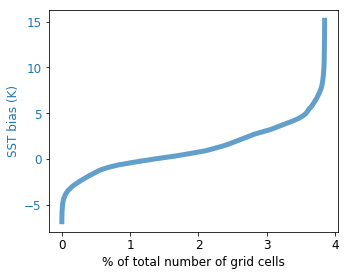

In [22]:
fig, ax1 = plt.subplots(figsize=(5,4))

r = model_data[:,:] - obs_data[:,:]
r_tmp = r.data[np.logical_not(r.mask)]
sorted_r = np.sort(r_tmp, axis=None)

color = 'tab:blue'
ax1.set_xlabel('% of total number of grid cells')
ax1.set_ylabel('SST bias (K)', color=color)
ax1.plot(np.linspace(0,100,np.size(sorted_r)),sorted_r, color=color,lw=5,alpha=0.7)
ax1.tick_params(axis='y', labelcolor=color)
# ax1.set_ylim([-1.0,1.0])

# ax2 = ax1.twiny().twinx()  # instantiate a second axes that shares the same x-axis

# r2 = corr_cube.data[:,:]*corr_cube.data[:,:]
# r2_tmp = r2.data[np.logical_not(r2.mask)]
# sorted_r2 = np.sort(r2_tmp, axis=None)

# color = 'tab:red'
# ax2.set_ylabel('R$^2$ sorted in ascending order', color=color)  # we already handled the x-label with ax1
# ax2.plot(np.linspace(0,100,np.size(sorted_r2)),sorted_r2, color=color,lw=5,alpha=0.7)
# ax2.tick_params(axis='y', labelcolor=color)
# ax2.set_ylim([-1.0,1.0])

plt.tight_layout()
plt.savefig('/Users/ph290/Documents/HalloranSync/documents/papers_in_prep/s2p3v2/figures/global_sst_bias_scatter.png',dpi=600)


In [23]:
r = model_data[:,:] - obs_data[:,:]
r_tmp = r.data[np.logical_not(r.mask)]
r_tmp2=abs(r_tmp)
sorted_r = np.sort(r_tmp2, axis=None)
a = np.size(np.where(sorted_r <= 2.0))
b = np.size(r_tmp2)

print 1.0 - ((b-a*1.0)/(b*1.0))


0.0221598685526


In [24]:
print b * (1.0-0.606420269356)
print a

332715.380358
18733


In [25]:
cube_tmp_yr = cube_yr
c_model_yr = extract_region(cube_tmp_yr,lon_west,lon_east,lat_south,lat_north)
# c_model.coord('longitude').points = c_model.coord('longitude').points + 180

obs_cube_tmp_yr = obs_cube_yr
c_obs_region_yr = extract_region(obs_cube_tmp_yr,lon_west,lon_east,lat_south,lat_north)

c_model_yr.coord('latitude').coord_system = c_obs_region_yr.coord('latitude').coord_system
c_model_yr.coord('longitude').coord_system = c_obs_region_yr.coord('longitude').coord_system

c_obs_region_regridded_yr = c_obs_region_yr.regrid(c_model_yr, iris.analysis.Linear())


In [26]:
# correlation
import iris.analysis.stats

time_coords=['season', 'season_year','year']

for time_coord in time_coords:
    try:
        c_obs_region_regridded_yr.remove_coord(time_coord)
    except:
        pass


for time_coord in time_coords:
    try:
        c_model_yr.remove_coord(time_coord)
    except:
        pass    

tmp_c_obs_region_regridded_yr = c_model_yr.copy()
tmp_c_obs_region_regridded_yr.data = c_obs_region_regridded_yr.data

corr_cube = iris.analysis.stats.pearsonr(tmp_c_obs_region_regridded_yr,c_model_yr,corr_coords=['time'])


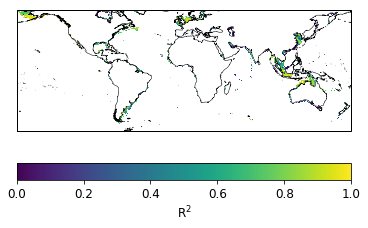

In [27]:
## plt.close('all')

# fig = plt.figure(figsize=(10, 10))
fig = plt.figure()


ax3 = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())
# ax3 = plt.axes(projection=ccrs.PlateCarree())
ax3.set_extent((lon_west, lon_east, lat_south, lat_north), crs=ccrs.PlateCarree())



model_data_yr = c_model_yr.data
lat_model = c_model_yr.coord('latitude').points
lon_model = c_model_yr.coord('longitude').points


obs_data_yr = c_obs_region_regridded_yr.data
lat_obs = c_obs_region_regridded_yr.coord('latitude').points
lon_obs = c_obs_region_regridded_yr.coord('longitude').points



# ax3 = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# ax3.contour(lon_bathy, lat_bathy,bathy_data,5,colors = 'k')
# fig.patch.set_facecolor('grey')

cmap = matplotlib.cm.viridis
cmap.set_bad((1.0, 1.0, 1.0, 1.0),1.)
# cmap.set_bad((0.2, 0.2, 0.2, 0.2),1.)
# cmap.set_bad((0.7, 0.7, 0.7, 0.7),1.)
# cmap.set_bad((0.0, 0.0, 0.0, 0.0),1.)

# cmap = matplotlib.cm.coolwarm

# ax3.add_feature(land_10m,edgecolor='none',facecolor=np.array([ 0.3 , 0.3 , 0.3]),)

p3 = ax3.pcolormesh(lon_obs, lat_model,corr_cube.data[:,:]*corr_cube.data[:,:],transform=ccrs.PlateCarree(),vmin=0.0,vmax=1,
cmap=cmap)
plt.gca().coastlines('50m',linewidth=0.5)
cbar = plt.colorbar(p3,orientation='horizontal')
cbar.set_label('R$^2$')


# plt.tight_layout()

plt.savefig('/Users/ph290/Documents/HalloranSync/documents/papers_in_prep/s2p3v2/figures/global_sst_validation_cci_correlation.png',dpi=600)
# plt.savefig('/Users/ph290/Documents/HalloranSync/documents/papers_in_prep/s2p3v2/figures/global_sst_validation_cci_2.pdf')

plt.show()

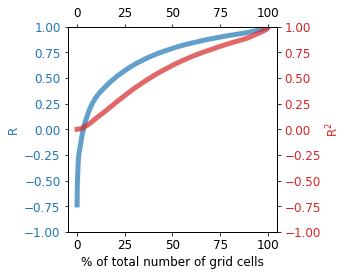

In [28]:
fig, ax1 = plt.subplots(figsize=(5,4))

r = corr_cube.data[:,:]
r_tmp = r.data[np.logical_not(r.mask)]
sorted_r = np.sort(r_tmp, axis=None)

color = 'tab:blue'
ax1.set_xlabel('% of total number of grid cells')
ax1.set_ylabel('R', color=color)
ax1.plot(np.linspace(0,100,np.size(sorted_r)),sorted_r, color=color,lw=5,alpha=0.7)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([-1.0,1.0])

ax2 = ax1.twiny().twinx()  # instantiate a second axes that shares the same x-axis

r2 = corr_cube.data[:,:]*corr_cube.data[:,:]
r2_tmp = r2.data[np.logical_not(r2.mask)]
sorted_r2 = np.sort(r2_tmp, axis=None)

color = 'tab:red'
ax2.set_ylabel('R$^2$', color=color)  # we already handled the x-label with ax1
ax2.plot(np.linspace(0,100,np.size(sorted_r2)),sorted_r2, color=color,lw=5,alpha=0.7)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([-1.0,1.0])

plt.tight_layout()
plt.savefig('/Users/ph290/Documents/HalloranSync/documents/papers_in_prep/s2p3v2/figures/global_sst_validation_cci_correlation_scatter.png',dpi=600)


In [29]:
r2.data[np.logical_not(r2.mask)]

array([ 0.1804324 ,  0.17485036,  0.03149598, ...,  0.26750832,
        0.04614051,  0.47509632])

# tidal data comparison

In [30]:
np.logical_not(r2.mask)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ..., False, False,  True]], dtype=bool)

In [31]:
tide_file = '/Users/ph290/Downloads/s12_m2_s2_n2_h_map_0point2_global_6565.dat'

In [32]:
# tide_data = np.genfromtxt(tide_file,skip_header=1)
tide_data = np.genfromtxt(tide_file,skip_header=1,delimiter=(8, 8,6,6,6,6,6,6,6,6,6,6,8))

IOError: /Users/ph290/Downloads/s12_m2_s2_n2_h_map_0point2_global_6565.dat not found.

In [ ]:
tide_data

In [ ]:
nx,ny = len(np.unique(tide_data[:,0])),len(np.unique(tide_data[:,1]))

X = tide_data[:,0].reshape(nx,ny).T
Y = tide_data[:,1].reshape(nx,ny).T
Z = tide_data[:,2].reshape(nx,ny).T # Note solumn 2 is M2 tides tidal_components = ['m2', 's2', 'n2','k1','o1']

plt.pcolormesh(X,Y,Z,vmin=00.0,vmax=150.0)
# plt.pcolormesh(X,Y,Z,vmin=0.0,vmax=5000.0)
plt.colorbar()
plt.show()

In [ ]:

plt.pcolormesh(X,Y,cube_all_tmp.data)


In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))
plt.pcolormesh(X,Y,model_data- obs_data,vmin=5,vmax=12)


In [ ]:
plt.scatter(Z,np.abs(model_data-obs_data),s=0.1)

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.stats import gaussian_kde

# x = np.reshape(Z,nx*ny)
# loc=np.isfinite(x)
# x=x[loc]
# y = np.reshape(np.abs(model_data-obs_data),nx*ny)[loc]
# loc=np.isfinite(y)
# x=x[loc]
# y=y[loc]

# # Calculate the point density
# xy = np.vstack([x,y])
# z = gaussian_kde(xy)(xy)

# fig, ax = plt.subplots(figsize=(5, 5))
# ax.scatter(x, y, c=z, s=10, edgecolor='',cmap='viridis')
# plt.xlabel('M2 tide amplitude (cm)')
# plt.ylabel('absolute SST bias ($^{\circ}$C)')

# plt.xlim([0,300])
# plt.colobar()
# plt.savefig('/Users/ph290/Documents/HalloranSync/documents/papers_in_prep/s2p3v2/figures/tides_v_t_bias.png',dpi=600)

# plt.show()

In [ ]:

x = np.reshape(Z,nx*ny)
loc=np.isfinite(x)
x=x[loc]
y = np.reshape(np.abs(model_data-obs_data),nx*ny)[loc]
loc=np.isfinite(y)
x=x[loc]
y=y[loc]

fig = plt.subplots(figsize=(5, 4))
ymax=6
xmax=100
loc = np.where(x <= xmax)
x = x[loc]
y = y[loc]
loc = np.where(y <= ymax)
x = x[loc]
y = y[loc]

plt.hist2d(x, y, (20, 20), cmap='Reds')
# plt.xlim(0,100)
# plt.ylim(0,6)
cbar = plt.colorbar()
cbar.set_label('number of grid cells per 2D bin')
# plt.show()

plt.xlabel('M2 tide amplitude (cm)')
plt.ylabel('absolute SST bias ($^{\circ}$C)')

plt.savefig('/Users/ph290/Documents/HalloranSync/documents/papers_in_prep/s2p3v2/figures/tides_v_t_bias.png',dpi=600)
